# Landscape Evolution Modelling

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import badlands_companion.toolGeo as simple
import badlands_companion.toolTec as tec
import badlands_companion.toolSea as tools

from badlands.model import Model as badlandsModel
from scripts import catchmentErosion as eroCatch

%config InlineBackend.figure_format = 'svg' 

In [48]:
from badlands import flowalgo
help(flowalgo)

Help on module badlands.flowalgo in badlands:

NAME
    badlands.flowalgo

DESCRIPTION
    This module 'flowalgo' is auto-generated with f2py (version:2).
    Functions:
      pypart = overlap(pyx,pyy,pyxst,pyyst,pyxed,pyyed,pynodes=len(pyx))
      pydonors,pystackorder = buildfa(pybase,pyrcv,pydelta,pybasenb=len(pybase),pydeltanb=len(pydelta),pynodesnb=len(pyrcv))
      eroparams(typefct,m,n,mt,nt,kt,kw,b,bsfct)
      pydis,pylay = discharge(sea,pystack,pyrcv,pyelev,pydischarge,pylnodesnb=len(pystack),pygnodesnb=len(pyrcv))
      pychi,pybasinid = parameters(pystack,pyrcv,pydischarge,pyxy,pybid0,pylnodesnb=len(pystack),pygnodesnb=len(pyrcv))
      pybasinid,pyvolume = basinparameters(pystack,pyrcv,pyelev,pywath,pyarea,pylnodesnb=len(pystack),pygnodesnb=len(pyrcv))
      pydrain = basindrainage(orderpits,pitid,pyrcv,pids,fillh,sea,pitnb=len(orderpits),pygnodesnb=len(pitid))
      pydrain = basindrainageall(orderpits,pitid,pyrcv,pids,pitnb=len(orderpits),pygnodesnb=len(pitid))
      cfl

### 1.  surface

Now, we move to another surface generation model based on a cosine wave. 

Here again, we first initialize the extent of the simulation area.

The function takes 3 arguments:
+ the extent of the domain along the X-axis [xmin,xmax] in metres,
+ the extent of the domain along the Y-axis [ymin,ymax] in metres,
+ the grid spacing `dx` in metres.

For more information regarding the function uncomment the following cell.

In [23]:
wave = simple.toolGeo(extentX=[0., 50000.], extentY=[0., 50000.], dx=500.)
wave.Z = wave.buildWave(A = 1000., P = 70000., base = -1000., xcenter = 0.)
wave.viewGrid(width = 600, height = 600, zmin = -1000, zmax = 1000, zData = wave.Z, title= 'Export Wave Grid')

In [24]:
wave.buildGrid(elevation=wave.Z, nameCSV='data/xyz')

### 2. uplift

The last example show how to create a displacements map with a step function. 

Here again, we first initialize the extent of the simulation area.

The function takes 3 arguments:
+ the extent of the domain along the X-axis [xmin,xmax] in metres,
+ the extent of the domain along the Y-axis [ymin,ymax] in metres,
+ the grid spacing `dx` in metres.

For more information regarding the function uncomment the following cell.

In [25]:
stpTec = tec.toolTec(extentX=[0., 50000.], extentY=[0., 50000.], dx = 500.)

We create the step function by defining 5 parameters:

+ the amplitude of the dispacement `A` in metres,
+ the base of the cumulative displacement in metres,
+ the extent of the step function *i.e.* min/max (in metres),
+ the axis used to build the wave function (either the X or Y axis)

For more information regarding the function uncomment the following cell.

In [26]:
stpTec.disp = stpTec.stepTec(A = 500, base=  100., edge1 = 0., edge2 = 1000., axis='X')

In [27]:
stpTec.dispView(width=600, height=600, dispmin=-1000, dispmax=1000, dispData=stpTec.disp, title='Export Step Map')

In [28]:
stpTec.dispGrid(disp=stpTec.disp, nameCSV='data/uplift')

### 3. sea-level

To build the curve you need to provide the following parameters:

+ the extent of the simulation time: start/end time (in years)
+ the discretisation timestep for sampling the sea level curve (in years)
+ the averaged sea level value for starting and ending times (in metres)
+ the averaged amplitude of the sea level wave for starting and ending times (in metres)
+ the averaged period of the sea level wave for starting and ending times (in years)

With the following information a simple curve is created which interpolate linearly the averaged values of sea-level trends over the specified time period.

For further information about this function uncomment the next cell.

In [29]:
sea = tools.toolSea()

In [38]:
# sea.buildCurve(timeExt = [0., 100000.], timeStep = 10000., seaExt = [0, 0], 
#                    ampExt = [-120, -120.], periodExt = [100000, 100000.])

sea.buildCurve(timeExt = [0., 100000.], timeStep = 10000., seaExt = [0, 0], 
                   ampExt = [0, -0.], periodExt = [100000, 100000.])

sea.plotCurves(fsize=(6,8), figName = 'Sea level')

In [39]:
sea.exportCurve(nameCSV='data/sea')

### 4. Run model

In [41]:
time = 100000.

# # ### Shelf width ###

model = badlandsModel()
# Define the XmL input file
model.load_xml('input.xml')
# Run model
model.run_to_time(time)

   - Writing outputs (0.08 seconds; tNow = 0.0)
   - Writing outputs (0.07 seconds; tNow = 10000.0)
   - Writing outputs (0.07 seconds; tNow = 20000.0)
   - Writing outputs (0.09 seconds; tNow = 30000.0)
   - Writing outputs (0.08 seconds; tNow = 40000.0)
   - Writing outputs (0.09 seconds; tNow = 50000.0)
   - Writing outputs (0.08 seconds; tNow = 60000.0)
   - Writing outputs (0.07 seconds; tNow = 70000.0)
   - Writing outputs (0.08 seconds; tNow = 80000.0)
   - Writing outputs (0.07 seconds; tNow = 90000.0)
tNow = 100000.0 (0.12 seconds)
   - Writing outputs (0.08 seconds; tNow = 100000.0)


### 5. Time slices

2
4
6
8
10


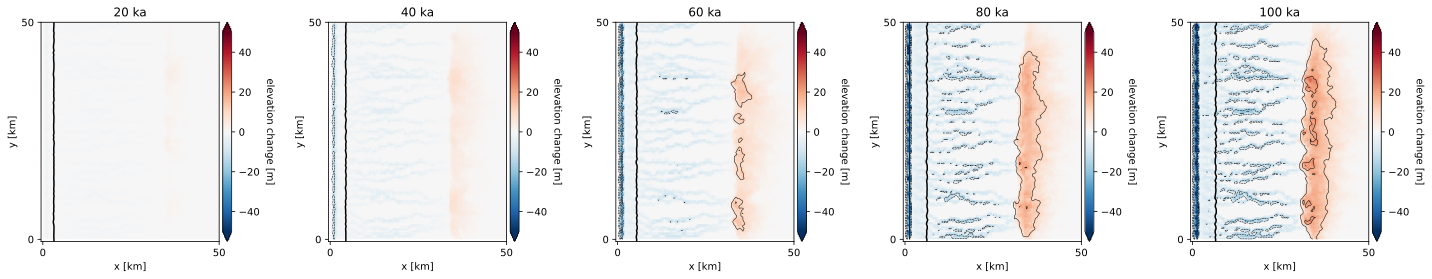

In [42]:
fig, ax = plt.subplots(figsize=(20, 4), ncols = 5)

def time_slice(path):

    x = 0

    for i in [2, 4, 6, 8, 10]:
        
        print(i)

        dataTIN = eroCatch.catchmentErosion(folder = path, timestep = i)
        dataTIN.regridTINdataSet()
        dataTIN.plotdataSet(data = dataTIN.dz, color='RdBu_r', depctr = [-30, -20, -10, 10, 20, 30],
                crange=[-50, 50], erange=[0, 50000, 0, 50000], lw=0.5, size=(2, 2), ax=ax[x])

        ax[x].contour(dataTIN.xi, dataTIN.yi, dataTIN.z, (0,), linestyles = 'solid',
                  colors='k', linestyle = 'dashed', linewidths = 1.5)
        ax[x].set_title(f'{(i * 10)} ka')

        x += 1

    plt.tight_layout(w_pad=2)
    # plt.savefig('figures/ts_50sw.jpg', dpi=400)
    
time_slice('outputs/model')